In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xbbg import blp

In [5]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= [x + " Equity" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())

# Industries

In [6]:
AIRL = ["AAL UW","ALK UN","CPA UN","DAL UN","JBLU UW","LUV UN","UAL UW"]
GAMBL = ["CZR UW","IGT UN","LVS UN","MGM UN","WYNN UW"]
CRUL = ["CCL UN","RCL US","NCLH US"]

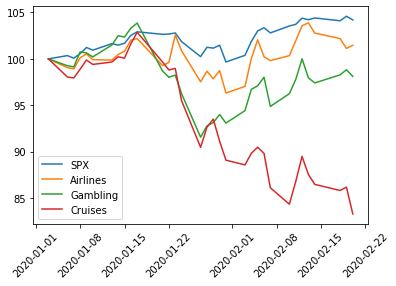

In [7]:
Date = "20200101"

AIR = GetRet(AIRL, Start = Date)
GAMB = GetRet(GAMBL, Start = Date)
CRU = GetRet(CRUL, Start = Date)
Bench = GetBench("SPX", Start = Date)
Plot(Bench)
Plot(AIR)
Plot(GAMB)
Plot(CRU)
plt.legend(["SPX", "Airlines", "Gambling", "Cruises"])
plt.xticks(rotation=45)
plt.show()

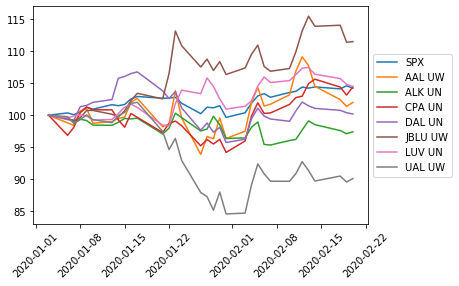

In [8]:
#Airlines
Date = "20200101"

Plot(Bench)
[Plot(GetRet([x], Start = Date)) for x in AIRL]
plt.legend(["SPX"] + AIRL, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

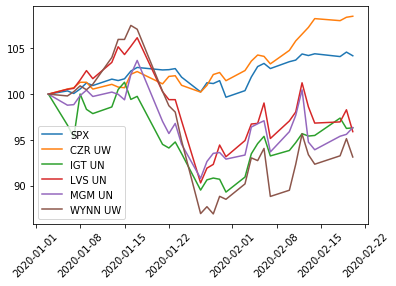

In [9]:
#Gambling
Date = "20200101"

Plot(Bench)
[Plot(GetRet([x], Start = Date)) for x in GAMBL]
plt.legend(["SPX"] + GAMBL)
plt.xticks(rotation=45)
plt.show()

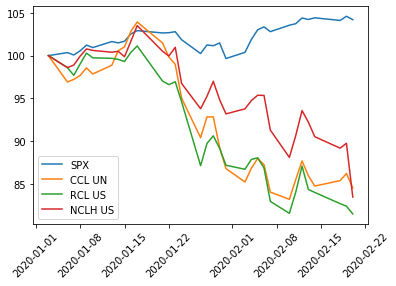

In [10]:
#Cruises
Date = "20200101"

Plot(Bench)
[Plot(GetRet([x], Start = Date)) for x in CRUL]
plt.legend(["SPX"] + CRUL)
plt.xticks(rotation=45)
plt.show()

# Composition

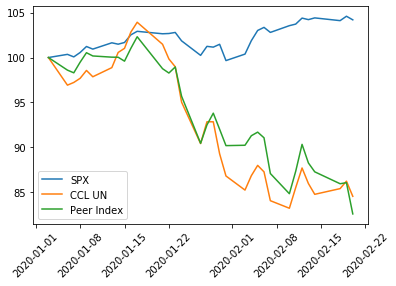

In [11]:
#Cruises
Date = "20200101"

Plot(Bench)
Plot(GetRet(["CCL UN"], Start = Date)) 
Plot(GetRet(["RCL US","NCLH US"], Start = Date))
plt.legend(["SPX", "CCL UN", "Peer Index"])
plt.xticks(rotation=45)
plt.show()

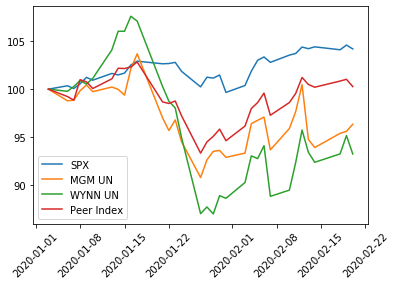

In [12]:
#Gambling
Date = "20200101"

Plot(Bench)
Plot(GetRet(["MGM UN"], Start = Date))
Plot(GetRet(["WYNN UN"], Start = Date)) 
Plot(GetRet(["CZR UW","IGT UN","LVS UN"], Start = Date))
plt.legend(["SPX", "MGM UN", "WYNN UN", "Peer Index"])
plt.xticks(rotation=45)
plt.show()

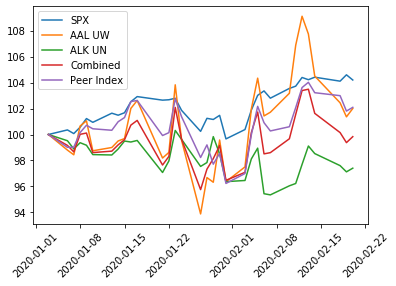

In [13]:
#Airlines
Date = "20200101"

Plot(Bench)
Plot(GetRet(["AAL UW"], Start = Date))
Plot(GetRet(["ALK UN"], Start = Date)) 
Plot((GetRet(["AAL UW"], Start = Date) + GetRet(["ALK UN"], Start = Date))/2) 
Plot(GetRet(["CPA UN","DAL UN","JBLU UW","LUV UN","UAL UW"], Start = Date))
plt.legend(["SPX", "AAL UW", "ALK UN", "Combined", "Peer Index"])
plt.xticks(rotation=45)
plt.show()